In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("Marktkampagne.csv")  # Adjust path as needed

# Rename columns to English
df.rename(columns={
    'Geburtsjahr': 'Birth_Year',
    'Bildungsniveau': 'Education_Level',
    'Familienstand': 'Marital_Status',
    'Einkommen': 'Income',
    'Kinder_zu_Hause': 'Children_Home',
    'Teenager_zu_Hause': 'Teenagers_Home',
    'Datum_Kunde': 'Customer_Since',
    'Letzter_Kauf_Tage': 'Last_Purchase_Days',
    'Ausgaben_Wein': 'Spending_Wine',
    'Ausgaben_Obst': 'Spending_Fruit',
    'Ausgaben_Fleisch': 'Spending_Meat',
    'Ausgaben_Fisch': 'Spending_Fish',
    'Ausgaben_Süßigkeiten': 'Spending_Sweets',
    'Ausgaben_Gold': 'Spending_Gold',
    'Anzahl_Rabattkäufe': 'Num_Discount_Purchases',
    'Anzahl_Webkäufe': 'Num_Web_Purchases',
    'Anzahl_Katalogkäufe': 'Num_Catalog_Purchases',
    'Anzahl_Ladeneinkäufe': 'Num_Store_Purchases',
    'Anzahl_WebBesuche_Monat': 'Num_Web_Visits_Month',
    'Kampagne_1_Akzeptiert': 'Campaign_1_Accepted',
    'Kampagne_2_Akzeptiert': 'Campaign_2_Accepted',
    'Kampagne_3_Akzeptiert': 'Campaign_3_Accepted',
    'Kampagne_4_Akzeptiert': 'Campaign_4_Accepted',
    'Kampagne_5_Akzeptiert': 'Campaign_5_Accepted',
    'Beschwerde': 'Complaint',
    'Z_Kontaktkostenfaktor': 'Z_Contact_Cost_Factor',
    'Z_Umsatzfaktor': 'Z_Revenue_Factor',
    'Antwort_Letzte_Kampagne': 'Response_Last_Campaign'
}, inplace=True)

# Translate categorical values
df['Marital_Status'] = df['Marital_Status'].replace({
    'Ledig': 'Single',
    'Zusammenlebend': 'Cohabiting',
    'Verheiratet': 'Married',
    'Geschieden': 'Divorced',
    'Verwitwet': 'Widowed',
    'Allein': 'Alone',
    'Absurd': 'Absurd',
    'Man lebt nur einmal': 'YOLO'
})

# Combine 'Alone' into 'Single'
df['Marital_Status'] = df['Marital_Status'].replace({'Alone': 'Single'})

# Drop nonsense categories
df = df[~df['Marital_Status'].isin(['Absurd', 'YOLO'])]

# Optional: Confirm cleaned values
print(df['Marital_Status'].value_counts())

df['Education_Level'] = df['Education_Level'].replace({
    'Hochschulabschluss': 'Diploma',
    'Doktor': 'PhD',
    'Master': 'Master',
    'Grundbildung': 'Basic_Education',
    'Zweiter Studienzyklus': 'Second_Cycle'
})

# Drop unnecessary ID column
df.drop(columns=['ID'], inplace=True)

# Convert Birth_Year to Age
df['Age'] = 2025 - df['Birth_Year']
df.drop(columns=['Birth_Year'], inplace=True)

# Convert Customer_Since to datetime and calculate tenure
df['Customer_Since'] = pd.to_datetime(df['Customer_Since'], dayfirst=True, errors='coerce')
df['Customer_Tenure_Years'] = ((pd.Timestamp('2025-06-01') - df['Customer_Since']) / pd.Timedelta(days=365)).round(2)

# Impute missing Income with mean
df['Income'].fillna(df['Income'].mean(), inplace=True)

# Create Total Spending column
df['Total_Spending'] = df[['Spending_Wine', 'Spending_Fruit', 'Spending_Meat',
                           'Spending_Fish', 'Spending_Sweets', 'Spending_Gold']].sum(axis=1).round(2)

# Round all numeric values (excluding binary flags) to 2 decimals
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    if not df[col].isin([0, 1]).all():
        df[col] = df[col].round(2)

# Remove duplicate rows if any
df = df.drop_duplicates()

# Reorder columns for readability
first_cols = ['Age', 'Income', 'Customer_Tenure_Years', 'Marital_Status', 'Education_Level',
              'Children_Home', 'Teenagers_Home', 'Total_Spending']
remaining_cols = [col for col in df.columns if col not in first_cols]
df = df[first_cols + remaining_cols]

# Show final structure and preview
print("Cleaned Data Info:")
print(df.info())

# Show rounded summary statistics
print("\nSummary Statistics (rounded):")
print(df.describe(include='all').round(2))

df.head()


Marital_Status
Married       864
Cohabiting    580
Single        483
Divorced      232
Widowed        77
Name: count, dtype: int64
Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 2053 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Age                     2053 non-null   int64         
 1   Income                  2053 non-null   float64       
 2   Customer_Tenure_Years   2053 non-null   float64       
 3   Marital_Status          2053 non-null   object        
 4   Education_Level         2053 non-null   object        
 5   Children_Home           2053 non-null   int64         
 6   Teenagers_Home          2053 non-null   int64         
 7   Total_Spending          2053 non-null   int64         
 8   Customer_Since          2053 non-null   datetime64[ns]
 9   Last_Purchase_Days      2053 non-null   int64         
 10  Spending_Wine          

C:\Users\keith\AppData\Local\Temp\ipykernel_8308\2505343729.py:79: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].mean(), inplace=True)


,Age,Income,Customer_Tenure_Years,Marital_Status,Education_Level,Children_Home,Teenagers_Home,Total_Spending,Customer_Since,Last_Purchase_Days,...,Num_Web_Visits_Month,Campaign_3_Accepted,Campaign_4_Accepted,Campaign_5_Accepted,Campaign_1_Accepted,Campaign_2_Accepted,Complaint,Z_Contact_Cost_Factor,Z_Revenue_Factor,Response_Last_Campaign
0,58,58138.0,2.74,Single,Diploma,0,0,1617,2022-09-04,58,...,7,0,0,0,0,0,0,3,11,1
1,61,46344.0,1.23,Single,Diploma,1,1,27,2024-03-08,38,...,5,0,0,0,0,0,0,3,11,0
2,50,71613.0,1.78,Cohabiting,Diploma,0,0,776,2023-08-21,26,...,4,0,0,0,0,0,0,3,11,0
3,31,26646.0,1.31,Cohabiting,Diploma,1,0,53,2024-02-10,26,...,6,0,0,0,0,0,0,3,11,0
4,34,58293.0,1.37,Married,PhD,1,0,422,2024-01-19,94,...,5,0,0,0,0,0,0,3,11,0


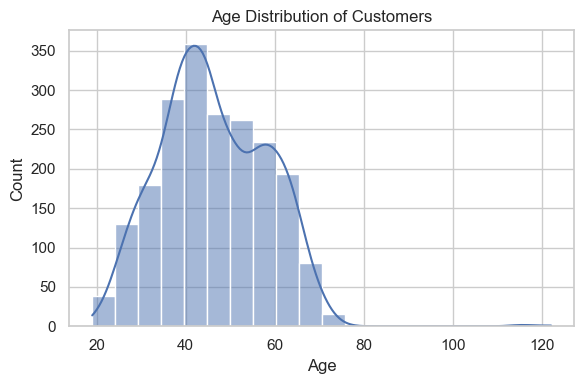

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

sns.set(style="whitegrid")

# Age Distribution 
plt.figure(figsize=(6, 4))
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


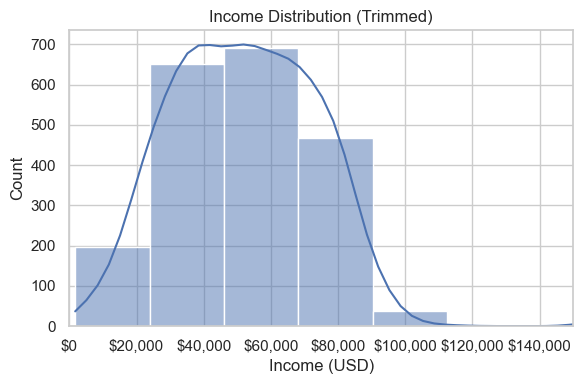

In [ ]:

# Income Distribution 
plt.figure(figsize=(6, 4))
sns.histplot(df['Income'], kde=True, bins=30)
plt.xlim(0, 150000)
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
plt.title('Income Distribution (Trimmed)')
plt.xlabel('Income (USD)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


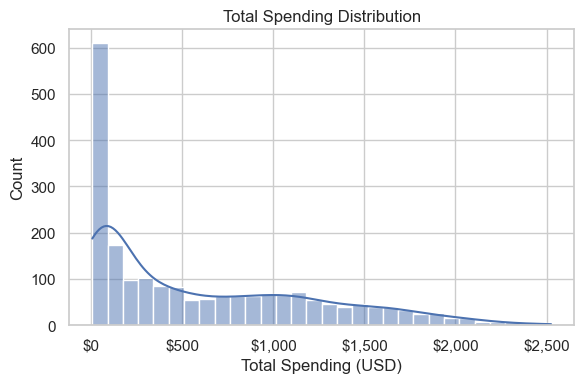

In [ ]:

# Total Spending Distribution 
plt.figure(figsize=(6, 4))
sns.histplot(df['Total_Spending'], kde=True, bins=30)
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
plt.title('Total Spending Distribution')
plt.xlabel('Total Spending (USD)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


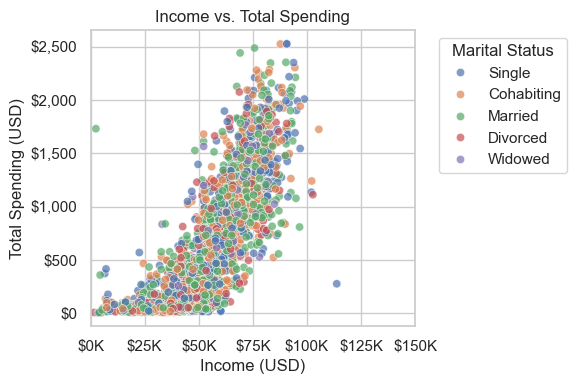

In [5]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")

# Income vs. Total Spending Scatterplot
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Income', y='Total_Spending', hue='Marital_Status', alpha=0.7)

# Limit x-axis and set custom ticks every $25,000
plt.xlim(0, 150000)
plt.gca().xaxis.set_major_locator(mtick.MultipleLocator(25000))  # ticks every 25K
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

# Format y-axis with dollar symbols (standard)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

# Add title and labels
plt.title('Income vs. Total Spending')
plt.xlabel('Income (USD)')
plt.ylabel('Total Spending (USD)')
plt.legend(title='Marital Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()




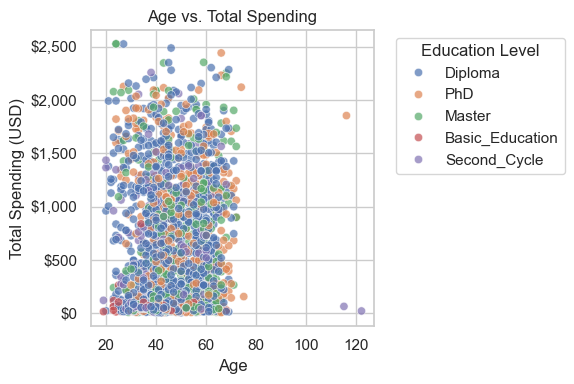

In [ ]:

# Age vs. Total Spending 
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Age', y='Total_Spending', hue='Education_Level', alpha=0.7)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
plt.title('Age vs. Total Spending')
plt.xlabel('Age')
plt.ylabel('Total Spending (USD)')
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


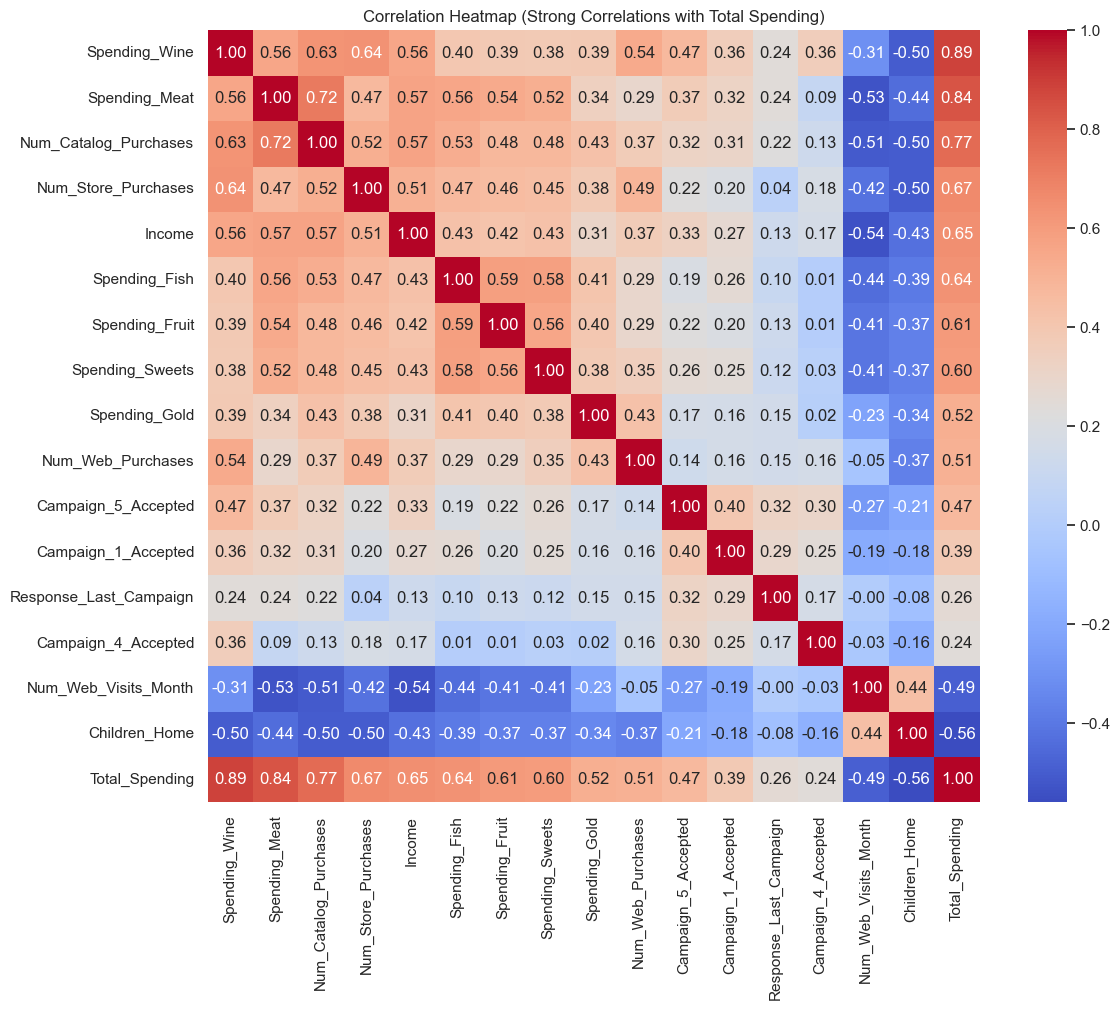

In [ ]:

# Correlation Heatmap
# Compute full correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()

# Select features with |correlation| > 0.2 with Total_Spending
spending_corrs = corr_matrix['Total_Spending'].drop('Total_Spending')
strong_corrs = spending_corrs[spending_corrs.abs() > 0.2].sort_values(ascending=False)

# Create a smaller DataFrame with just those features
strong_features = strong_corrs.index.tolist() + ['Total_Spending']
filtered_df = df[strong_features]

# Create the filtered correlation heatmap
plt.figure(figsize=(12, 10))
filtered_corr_matrix = filtered_df.corr().round(2)
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap (Strong Correlations with Total Spending)')
plt.tight_layout()
plt.show()


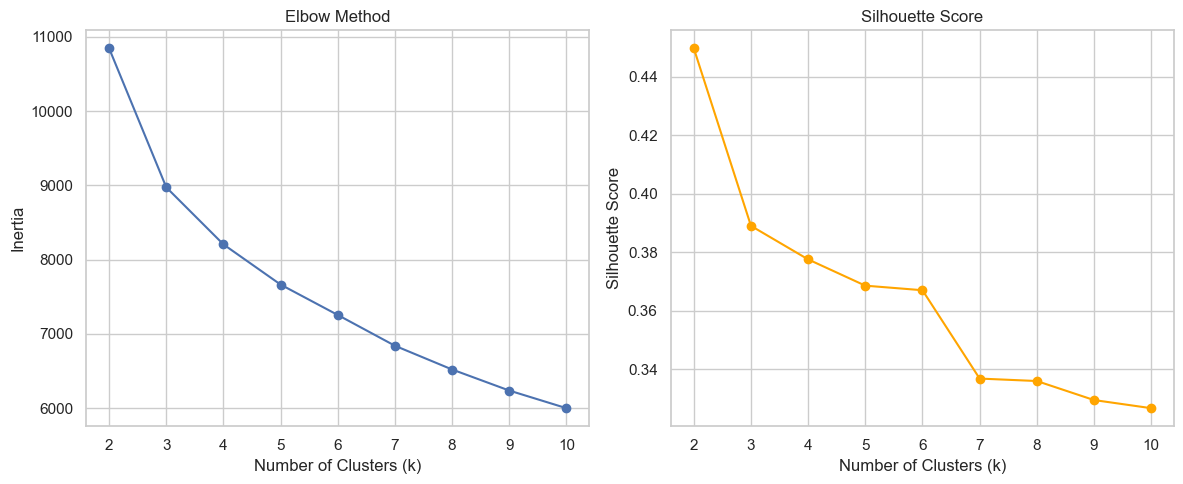

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Select relevant features for clustering
cluster_features = [
    'Spending_Wine', 'Spending_Fruit', 'Spending_Meat',
    'Spending_Fish', 'Spending_Sweets', 'Spending_Gold',
    'Num_Web_Purchases', 'Num_Store_Purchases', 'Num_Catalog_Purchases'
]

X = df[cluster_features].dropna()  # drop rows with missing values

# Standardize features (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters using Elbow + Silhouette
inertia = []
silhouette = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot Elbow Method and Silhouette Scores
plt.figure(figsize=(12, 5))

# Elbow Plot
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Silhouette Plot
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette, marker='o', color='orange')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


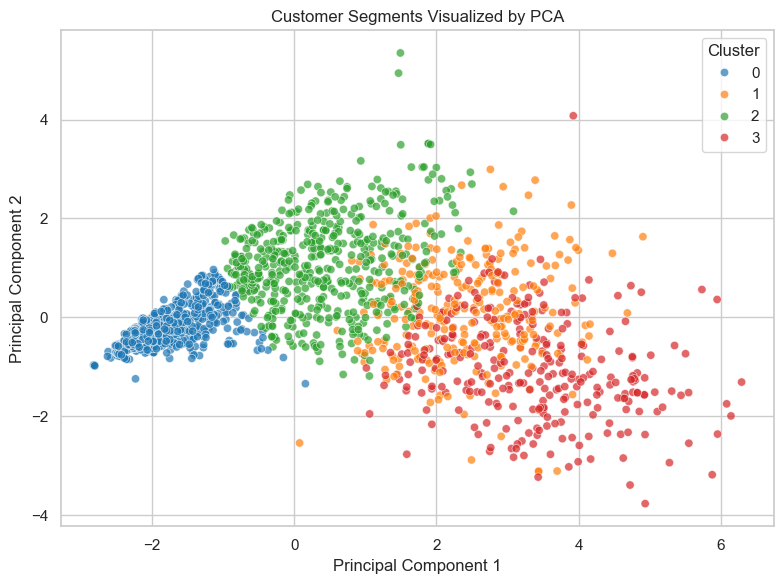

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Fit KMeans with optimal k
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Dimensionality reduction with PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Add PCA coordinates to the DataFrame
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='tab10', alpha=0.7)
plt.title('Customer Segments Visualized by PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


In [ ]:
# Cluster Profiling - Rename Columns (if needed)
df.rename(columns={
    'Einkommen': 'Income',
    'Ausgaben_Wein': 'Spending_Wine',
    'Ausgaben_Obst': 'Spending_Fruit',
    'Ausgaben_Fleisch': 'Spending_Meat',
    'Ausgaben_Fisch': 'Spending_Fish',
    'Ausgaben_Süßigkeiten': 'Spending_Sweets',
    'Ausgaben_Gold': 'Spending_Gold',
    'Anzahl_Webkäufe': 'Num_Web_Purchases',
    'Anzahl_Ladeneinkäufe': 'Num_Store_Purchases',
    'Anzahl_Katalogkäufe': 'Num_Catalog_Purchases',
    'Anzahl_Rabattkäufe': 'Num_Discount_Purchases',
    'Antwort_Letzte_Kampagne': 'Response_Last_Campaign'
}, inplace=True)

# Define profiling features
profile_features = [
    'Cluster', 'Income', 'Spending_Wine', 'Spending_Fruit', 'Spending_Meat',
    'Spending_Fish', 'Spending_Sweets', 'Spending_Gold',
    'Num_Web_Purchases', 'Num_Store_Purchases', 'Num_Catalog_Purchases',
    'Num_Discount_Purchases', 'Response_Last_Campaign'
]

# Group by Cluster and calculate means
cluster_profile = df.groupby('Cluster')[profile_features[1:]].mean().round(2)

# Display result
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Print nicely in a notebook or console
print("Cluster Profile Summary:")
display(cluster_profile)


Cluster Profile Summary:


,Income,Spending_Wine,Spending_Fruit,Spending_Meat,Spending_Fish,Spending_Sweets,Spending_Gold,Num_Web_Purchases,Num_Store_Purchases,Num_Catalog_Purchases,Num_Discount_Purchases,Response_Last_Campaign
Cluster,,,,,,,,,,,,
0,36446.82,45.30,4.72,22.96,6.39,4.85,14.40,2.12,3.26,0.56,2.12,0.09
1,75905.33,747.39,40.71,495.38,66.74,45.08,57.20,5.12,8.49,6.77,1.73,0.30
2,57802.32,439.88,18.79,125.87,27.88,19.41,62.12,6.39,7.47,2.86,3.43,0.14
3,72715.19,492.85,96.86,399.62,127.48,98.04,96.74,5.71,8.53,5.26,1.78,0.22


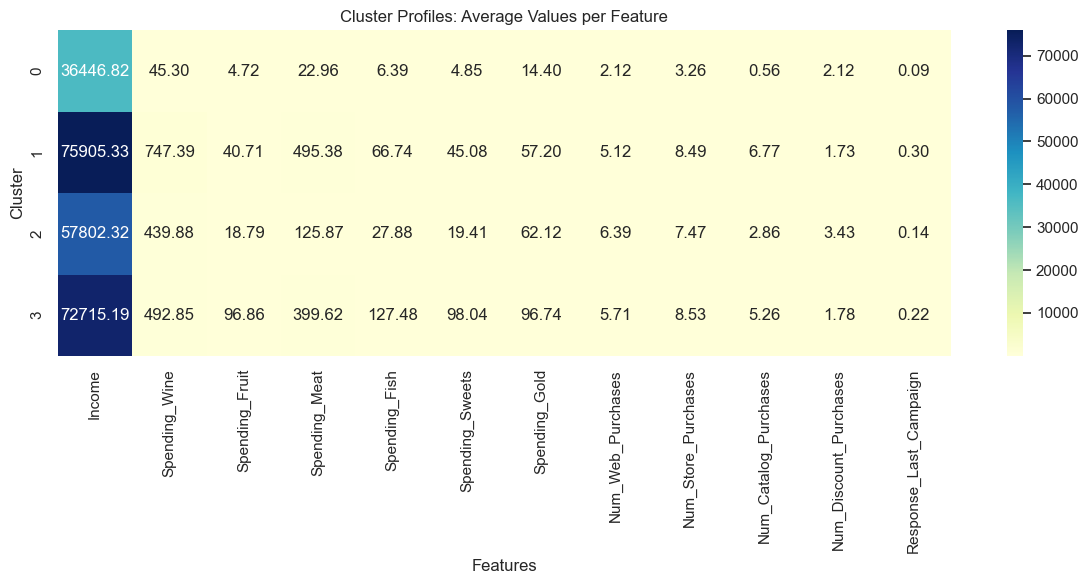

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create heatmap from cluster profile
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_profile, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Cluster Profiles: Average Values per Feature')
plt.xlabel('Features')
plt.ylabel('Cluster')
plt.tight_layout()
plt.show()


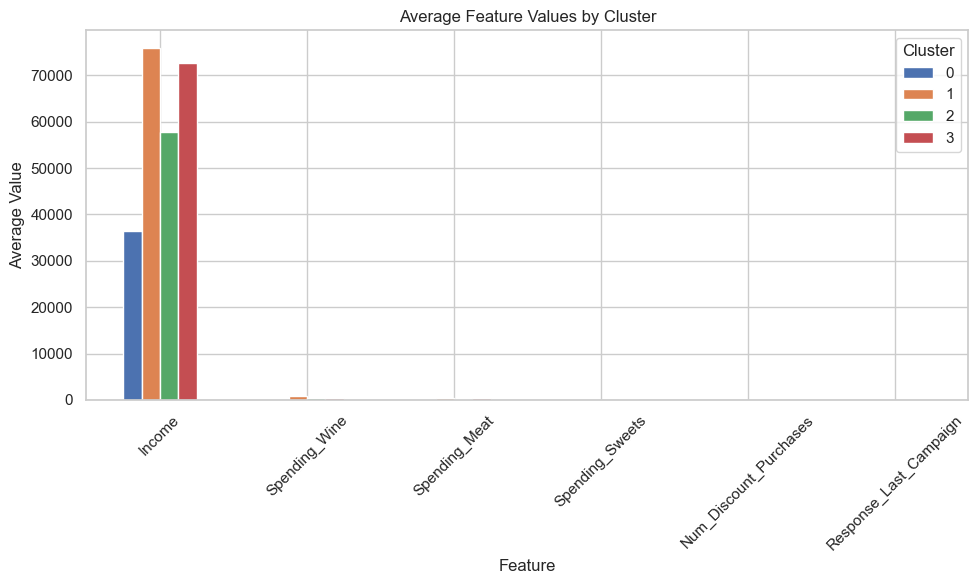

In [12]:
import matplotlib.pyplot as plt

# Choose key features to visualize per cluster
selected_features = [
    'Income', 
    'Spending_Wine', 
    'Spending_Meat', 
    'Spending_Sweets', 
    'Num_Discount_Purchases', 
    'Response_Last_Campaign'
]

# Create a smaller dataframe for selected features
bar_data = cluster_profile[selected_features]

# Plot grouped bar chart
bar_data.T.plot(kind='bar', figsize=(10, 6))
plt.title('Average Feature Values by Cluster')
plt.ylabel('Average Value')
plt.xlabel('Feature')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


📄 Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92       529
           1       0.39      0.13      0.19        87

    accuracy                           0.85       616
   macro avg       0.63      0.55      0.55       616
weighted avg       0.80      0.85      0.81       616


🔢 Confusion Matrix:
 [[512  17]
 [ 76  11]]


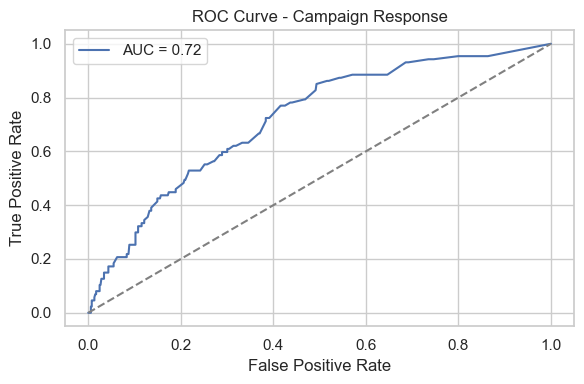

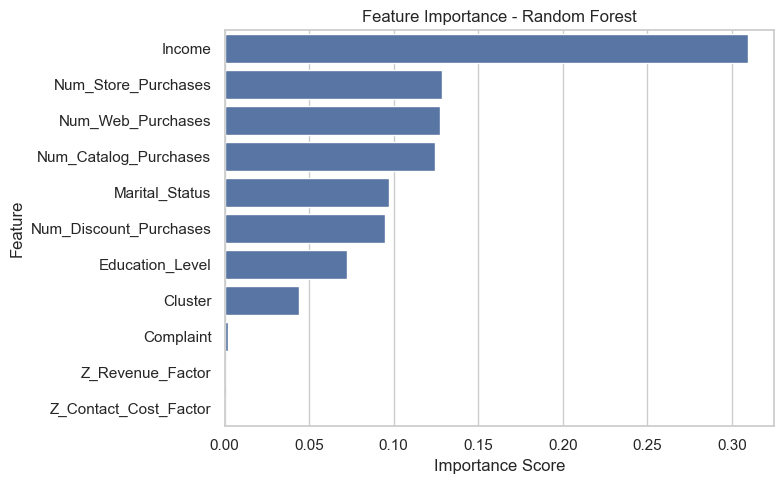

In [ ]:
# Rename all needed columns (skip Education if already good)
df.rename(columns={
    'Einkommen': 'Income',
    'Familienstand': 'Marital_Status',
    'Beschwerde': 'Complaint',
    'Antwort_Letzte_Kampagne': 'Response_Last_Campaign',
    'Z_Kontaktkostenfaktor': 'Z_Contact_Cost_Factor',
    'Z_Umsatzfaktor': 'Z_Revenue_Factor',
    'Anzahl_Rabattkäufe': 'Num_Discount_Purchases',
    'Anzahl_Webkäufe': 'Num_Web_Purchases',
    'Anzahl_Ladeneinkäufe': 'Num_Store_Purchases',
    'Anzahl_Katalogkäufe': 'Num_Catalog_Purchases'
}, inplace=True)

# Define features using Education_Level
features = [
    'Income', 'Complaint', 'Num_Discount_Purchases',
    'Num_Web_Purchases', 'Num_Store_Purchases', 'Num_Catalog_Purchases',
    'Cluster', 'Z_Contact_Cost_Factor', 'Z_Revenue_Factor',
    'Response_Last_Campaign', 'Education_Level', 'Marital_Status'
]

# Drop missing values and prepare DataFrame
rf_df = df[features].dropna()

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in ['Education_Level', 'Marital_Status']:
    le = LabelEncoder()
    rf_df[col] = le.fit_transform(rf_df[col])
    label_encoders[col] = le

# Define X and y
X = rf_df.drop('Response_Last_Campaign', axis=1)
y = rf_df['Response_Last_Campaign']

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

print("📄 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🔢 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC Curve
import matplotlib.pyplot as plt
import seaborn as sns

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.title("ROC Curve - Campaign Response")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()
plt.show()

# Feature Importance
import pandas as pd

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=importances.index)
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [14]:
# Check unique values and value counts in 'Response_Last_Campaign'
print("Unique values in Response_Last_Campaign:")
print(df['Response_Last_Campaign'].unique())

print("\nValue counts:")
print(df['Response_Last_Campaign'].value_counts(normalize=True).round(3))

# Compare to other campaign columns if they exist
campaign_cols = [col for col in df.columns if 'Kampagne' in col or 'Campaign' in col]
df[campaign_cols].sum()


Unique values in Response_Last_Campaign:
[1 0]

Value counts:
Response_Last_Campaign
0    0.849
1    0.151
Name: proportion, dtype: float64


Campaign_3_Accepted       151
Campaign_4_Accepted       158
Campaign_5_Accepted       147
Campaign_1_Accepted       134
Campaign_2_Accepted        26
Response_Last_Campaign    311
dtype: int64

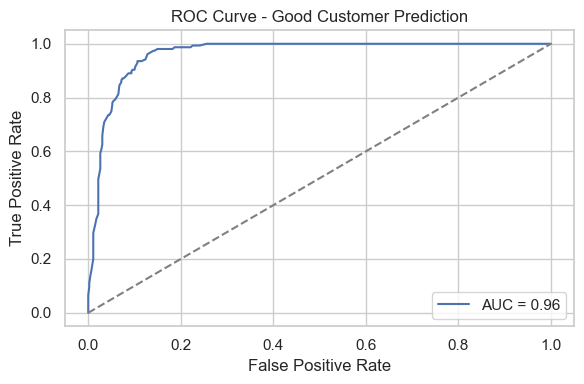

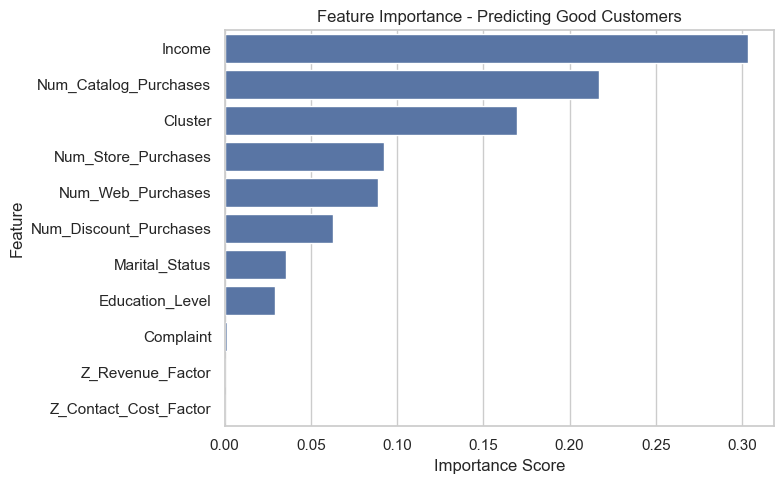

('              precision    recall  f1-score   support\n\n           0       0.95      0.93      0.94       461\n           1       0.80      0.86      0.83       155\n\n    accuracy                           0.91       616\n   macro avg       0.88      0.90      0.89       616\nweighted avg       0.92      0.91      0.91       616\n',
 array([[428,  33],
        [ 21, 134]]))

In [ ]:
# Recalculate Total_Spending in case of reset
df['Total_Spending'] = (
    df['Spending_Wine'] +
    df['Spending_Fruit'] +
    df['Spending_Meat'] +
    df['Spending_Fish'] +
    df['Spending_Sweets'] +
    df['Spending_Gold']
)

# Define good customer as top 25% spender
threshold = df['Total_Spending'].quantile(0.75)
df['Good_Customer'] = (df['Total_Spending'] > threshold).astype(int)

# Select model features
features = [
    'Income', 'Complaint', 'Num_Discount_Purchases',
    'Num_Web_Purchases', 'Num_Store_Purchases', 'Num_Catalog_Purchases',
    'Cluster', 'Z_Contact_Cost_Factor', 'Z_Revenue_Factor',
    'Good_Customer', 'Education_Level', 'Marital_Status'
]

# Drop rows with missing values
good_df = df[features].dropna()

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in ['Education_Level', 'Marital_Status']:
    le = LabelEncoder()
    good_df[col] = le.fit_transform(good_df[col])
    label_encoders[col] = le

# Train-test split
from sklearn.model_selection import train_test_split

X = good_df.drop('Good_Customer', axis=1)
y = good_df['Good_Customer']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate model
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Plot ROC curve
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.title("ROC Curve - Good Customer Prediction")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()
plt.show()

# Feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=importances.index)
plt.title('Feature Importance - Predicting Good Customers')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Output evaluation
report, conf_matrix


C:\Users\keith\AppData\Local\Temp\ipykernel_8308\1622792703.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Cluster_Label', y='Total_Spending', estimator=np.mean, ci=None)


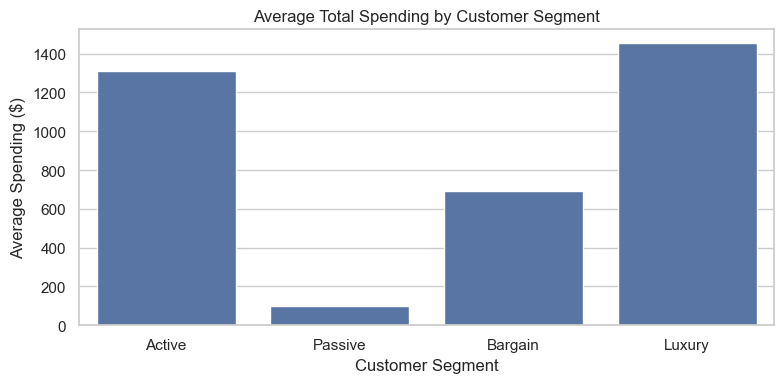

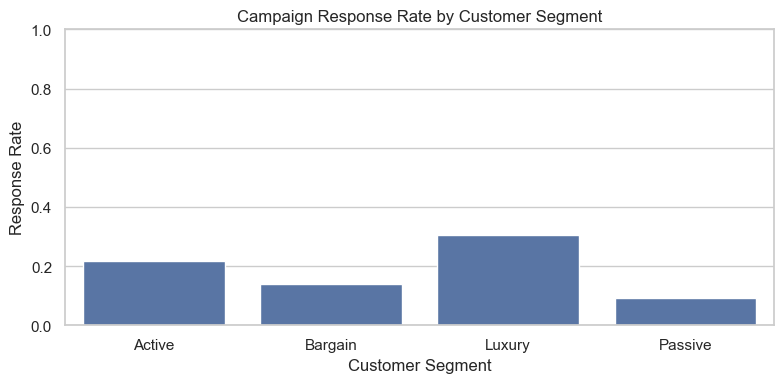

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Rename German column to English
df.rename(columns={
    'Antwort_Letzte_Kampagne': 'Response_Last_Campaign'
}, inplace=True)

# Recreate Total_Spending from spending categories
df['Total_Spending'] = (
    df['Spending_Wine'] +
    df['Spending_Fruit'] +
    df['Spending_Meat'] +
    df['Spending_Fish'] +
    df['Spending_Sweets'] +
    df['Spending_Gold']
)

# Assign one-word labels to clusters
cluster_label_map = {
    0: 'Passive',
    1: 'Luxury',
    2: 'Bargain',
    3: 'Active'
}
df['Cluster_Label'] = df['Cluster'].map(cluster_label_map)

# Bar chart: Average Total Spending by Segment
plt.figure(figsize=(8, 4))
sns.barplot(data=df, x='Cluster_Label', y='Total_Spending', estimator=np.mean, ci=None)
plt.title('Average Total Spending by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average Spending ($)')
plt.tight_layout()
plt.show()

# Bar chart: Campaign Response Rate by Segment
response_by_label = df.groupby('Cluster_Label')['Response_Last_Campaign'].mean().reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(data=response_by_label, x='Cluster_Label', y='Response_Last_Campaign')
plt.title('Campaign Response Rate by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Response Rate')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


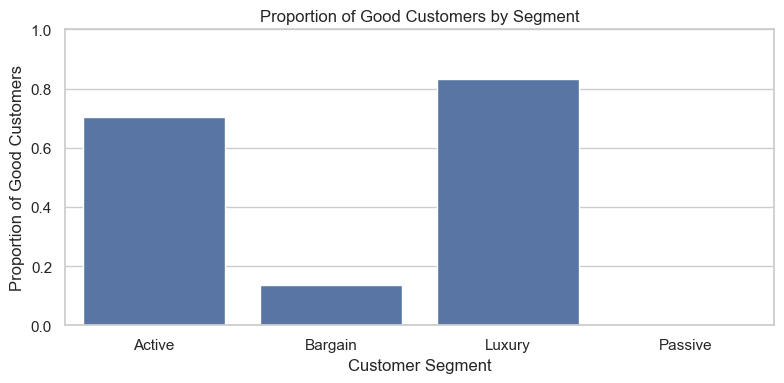

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Recreate 'Good_Customer' column (top 25% of Total Spending)
spending_threshold = df['Total_Spending'].quantile(0.75)
df['Good_Customer'] = (df['Total_Spending'] > spending_threshold).astype(int)

# Group by customer segment and calculate proportion of good customers
good_by_cluster = df.groupby('Cluster_Label')['Good_Customer'].mean().reset_index()

# Bar plot
plt.figure(figsize=(8, 4))
sns.barplot(data=good_by_cluster, x='Cluster_Label', y='Good_Customer')
plt.title('Proportion of Good Customers by Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Proportion of Good Customers')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


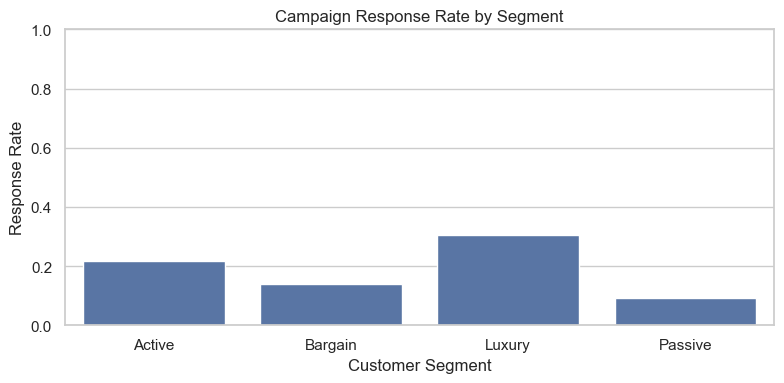

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by cluster and compute average response rate to the last campaign
response_by_cluster = df.groupby('Cluster_Label')['Response_Last_Campaign'].mean().reset_index()

# Create bar plot
plt.figure(figsize=(8, 4))
sns.barplot(data=response_by_cluster, x='Cluster_Label', y='Response_Last_Campaign')
plt.title('Campaign Response Rate by Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Response Rate')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


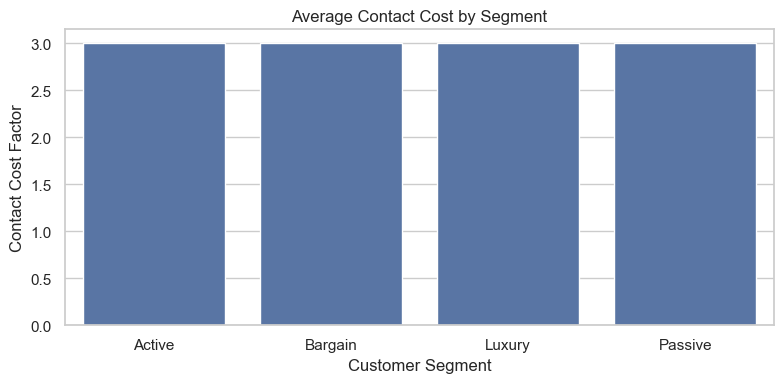

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Rename column if not done yet
df.rename(columns={'Z_Kontaktkostenfaktor': 'Z_Contact_Cost_Factor'}, inplace=True)

# Group by segment and calculate mean contact cost
cost_by_cluster = df.groupby('Cluster_Label')['Z_Contact_Cost_Factor'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(data=cost_by_cluster, x='Cluster_Label', y='Z_Contact_Cost_Factor')
plt.title('Average Contact Cost by Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Contact Cost Factor')
plt.tight_layout()
plt.show()
